### Perceptron

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
from sklearn.linear_model import Perceptron

In [4]:
iris = load_iris()

In [5]:
X = iris.data[:,(2,3)] # petal length and petal width

In [6]:
y = (iris.target == 0).astype(np.int) # Iris Setosa

In [7]:
per_clf = Perceptron()

In [8]:
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_pred = per_clf.predict([[2.5,0.5]])

In [10]:
y_pred

array([0])

### MLP with Keras

In [11]:
import tensorflow as tf

In [12]:
from tensorflow import keras

In [13]:
tf.__version__

'2.0.0'

In [14]:
keras.__version__

'2.2.4-tf'

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [19]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Coat'

In [22]:
model = keras.Sequential()

In [23]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


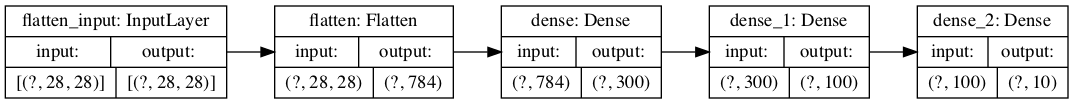

In [28]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,)

In [30]:
model.layers

In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04940578, -0.02783052,  0.01483356, ...,  0.07174394,
        -0.0711653 , -0.06513125],
       [-0.00557442, -0.03177856,  0.01801509, ..., -0.04548601,
        -0.0354766 ,  0.02285996],
       [ 0.04340206, -0.02226761,  0.00204062, ..., -0.01108495,
         0.05940284, -0.0368698 ],
       ...,
       [-0.0688239 , -0.02743622,  0.06371485, ...,  0.00964512,
         0.07300888,  0.03725201],
       [-0.00482503, -0.00884669, -0.00031595, ...,  0.01680797,
         0.06686597, -0.02955016],
       [ 0.06459118,  0.01501787, -0.01082584, ..., -0.06740575,
        -0.00421008,  0.04341315]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.2228 - accuracy: 0.9194 - val_loss: 0.3065 - val_accuracy: 0.8902
Epoch 2/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.2196 - accuracy: 0.9208 - val_loss: 0.2943 - val_accuracy: 0.8942
Epoch 3/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.2155 - accuracy: 0.9236 - val_loss: 0.2877 - val_accuracy: 0.8946
Epoch 4/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.2115 - accuracy: 0.9238 - val_loss: 0.2928 - val_accuracy: 0.8940
Epoch 5/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.2082 - accuracy: 0.9254 - val_loss: 0.3157 - val_accuracy: 0.8850
Epoch 6/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.2059 - accuracy: 0.9264 - val_loss: 0.2933 - val_accuracy: 0.8932
Epoch 7/30
55000/55000 [============================

In [44]:
import pandas as pd

In [45]:
import matplotlib.pyplot as plt

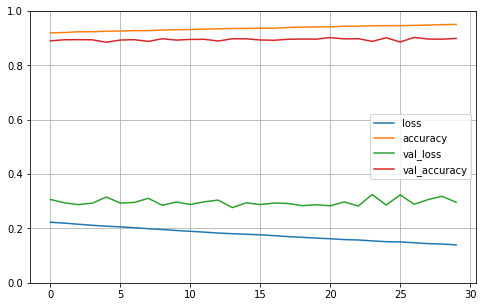

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [47]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[66.50599293966293, 0.862]

In [49]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [51]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [52]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Regression MLP

In [53]:
from sklearn.datasets import fetch_california_housing

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
housing = fetch_california_housing()

In [57]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [70]:
model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd", 
              validation_data=(X_valid, y_valid), 
              metrics=[keras.metrics.MeanSquaredError()])

In [71]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 88us/sample - loss: 0.8203 - mean_squared_error: 0.8203 - val_loss: 0.7063 - val_mean_squared_error: 0.7063
Epoch 2/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.8311 - mean_squared_error: 0.8311 - val_loss: 3.6560 - val_mean_squared_error: 3.6560
Epoch 3/30
11610/11610 [==============================] - 1s 50us/sample - loss: 14.7115 - mean_squared_error: 14.7115 - val_loss: 1.2380 - val_mean_squared_error: 1.2380
Epoch 4/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.8913 - mean_squared_error: 0.8913 - val_loss: 0.5220 - val_mean_squared_error: 0.5220
Epoch 5/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4715 - mean_squared_error: 0.4715 - val_loss: 0.4711 - val_mean_squared_error: 0.4711
Epoch 6/30
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4525 - mean_squared_e

In [72]:
mse_test = model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [74]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [75]:
y_pred

array([[2.8393621 ],
       [2.3898783 ],
       [0.91392225]], dtype=float32)

In [76]:
y_test[:3]

array([1.848, 2.307, 0.598])

### wide and deep network

In [79]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

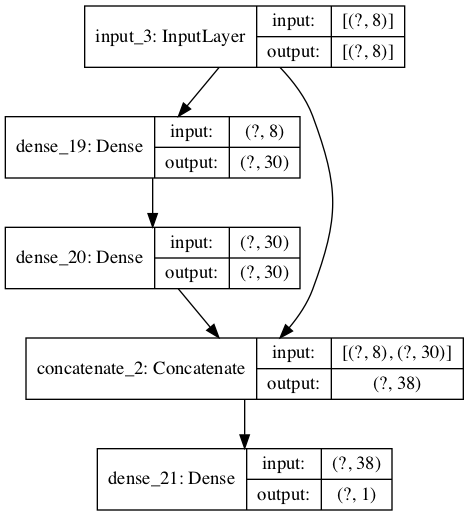

In [81]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,)

### Subclassing API

It's imperative style programming for creating models

In [83]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
        

In [85]:
model = WideAndDeepModel()

In [98]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [99]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 161us/sample - loss: 2.6840 - output_1_loss: 2.4444 - output_2_loss: 4.8353 - val_loss: 1.2633 - val_output_1_loss: 0.9850 - val_output_2_loss: 3.7644
Epoch 2/10
11610/11610 [==============================] - 1s 76us/sample - loss: 1.0076 - output_1_loss: 0.7941 - output_2_loss: 2.9284 - val_loss: 0.9122 - val_output_1_loss: 0.7265 - val_output_2_loss: 2.5802
Epoch 3/10
11610/11610 [==============================] - 1s 74us/sample - loss: 0.8126 - output_1_loss: 0.6652 - output_2_loss: 2.1440 - val_loss: 0.7917 - val_output_1_loss: 0.6566 - val_output_2_loss: 2.0056
Epoch 4/10
11610/11610 [==============================] - 1s 88us/sample - loss: 0.7301 - output_1_loss: 0.6170 - output_2_loss: 1.7472 - val_loss: 0.7301 - val_output_1_loss: 0.6208 - val_output_2_loss: 1.7122
Epoch 5/10
11610/11610 [==============================] - 1s 72us/sample - loss: 0.6863 - output_1_loss: 0

### Tensorboard

In [86]:
import os

In [87]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [90]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [100]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_06_12-16_05_14'

In [101]:
keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

In [104]:
model = keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [105]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 2s 134us/sample - loss: 1.8789 - val_loss: 0.8026
Epoch 2/30
11610/11610 [==============================] - 1s 55us/sample - loss: 0.7044 - val_loss: 0.6725
Epoch 3/30
11610/11610 [==============================] - 1s 54us/sample - loss: 0.6207 - val_loss: 0.6142
Epoch 4/30
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5764 - val_loss: 0.5825
Epoch 5/30
11610/11610 [==============================] - 1s 55us/sample - loss: 0.5505 - val_loss: 0.5593
Epoch 6/30
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5299 - val_loss: 0.5415
Epoch 7/30
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5143 - val_loss: 0.5267
Epoch 8/30
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5024 - val_loss: 0.5150
Epoch 9/30
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4922 - val_

In [107]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)